In [ ]:
from torchvision import transforms
from torchvision.datasets import MNIST

train_data = MNIST('mnist_train', train=True, transform=transforms.ToTensor(), download=True)
test_data = MNIST('mnist_test', train=False, transform=transforms.ToTensor(), download=True)
print("Train data shape: {0}".format(train_data.data.shape))

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader
from network import CharacterClassifier
from tqdm import tqdm

input_dim = (1, 28, 28)
hidden_layers = [50, 100, 500]
output_dim = 10

train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
test_loader = DataLoader(test_data, batch_size=16, shuffle=False)

model = CharacterClassifier(input_dim, hidden_layers, output_dim)
model.train()

epochs = 5
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss()

for epoch in range(epochs):
        print("Epoch {0}".format(epoch))
        for step, [x_train, y_train] in enumerate(tqdm(train_loader)):
            optimizer.zero_grad()
            train_pred = model(x_train)
            loss = criterion(train_pred, y_train)
            loss.backward()
            optimizer.step()
            if step % 300 == 0:
                print('Loss: {}'.format(loss))
            torch.save(model.state_dict(), 'cc{}.ckpt'.format(step))                
model.eval()
accuracies = []
for idx, [x_test, y_test] in enumerate(tqdm(test_loader, desc='Test')):
    test_pred = model(x_test)
    accuracy = 100 * torch.mean((torch.argmax(test_pred, dim=1) == y_test).float())
    accuracies.append(accuracy)
print("Accuracy: {0}".format(np.mean(accuracies)))

In [ ]:
import os
import torch
import cv2
from matplotlib import pyplot as plt
from PIL import Image

file_path = "SubImages"
raw_images = []
images = []
for file_name in os.listdir(file_path):
    img = cv2.imread(file_path+'/'+file_name)
    img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    raw_images.append(img)
    np_img = np.asarray(img).reshape((1, 28, 28))
    images.append(np_img)  
image_tensor = torch.Tensor(images)
prediction = model(image_tensor)
labels = torch.argmax(prediction, dim=1)

eps = 1e-08

i = 0
for label in labels: 
    plt.imshow(raw_images[i])
    plt.show()  
    print(label)  
    i+=1

In [1]:
import torch
import os
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader
from network import CharacterClassifier
from tqdm import tqdm
from training_data import HASY
from PIL import Image
from matplotlib import pyplot as plt

hasy_train = HASY('HASY')
hasy_test = HASY('HASY', train=False)

print("Train data length: {0}".format(len(hasy_train.data)))
print("Test data length: {0}".format(len(hasy_test.data)))
print("Img Shape: {0}".format(hasy_train.data[0].shape))
print("Number of Labels: {0}".format(hasy_train.no_labels))



100%|██████████| 16992/16992 [00:00<00:00, 64211.43it/s]

Train data length: 9825
Test data length: 1116
Img Shape: torch.Size([1, 32, 32])
Number of Labels: 19


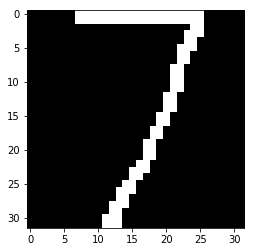

In [2]:
from torchvision import transforms
test_img = transforms.ToPILImage()(hasy_train.data[0])
plt.imshow(test_img, cmap='gray')
plt.show()

In [3]:
hasy_model = CharacterClassifier(hasy_train.img_dims, [50], hasy_train.no_labels)
hasy_model.train()

epochs = 15
optimizer = torch.optim.SGD(hasy_model.parameters(), lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss()

train_loader = DataLoader(hasy_train, batch_size=16, shuffle=True)
test_loader = DataLoader(hasy_test, batch_size=16, shuffle=False)
    
for epoch in range(epochs):
        print("Epoch {0}".format(epoch))
        for step, [x_train, y_train] in enumerate(tqdm(train_loader)):
            optimizer.zero_grad()
            train_pred = hasy_model(x_train)
            loss = criterion(train_pred, y_train)
            loss.backward()
            optimizer.step()
            if step % 100 == 0:
                print('Loss: {}'.format(loss))
torch.save(hasy_model.state_dict(), 'hasy_model-02.ckpt')        
           

accuracies = []
for idx, [x_test, y_test] in enumerate(tqdm(test_loader, desc='Test')):
    test_pred = hasy_model(x_test)
    accuracy = 100 * torch.mean((torch.argmax(test_pred, dim=1) == y_test).float())
    accuracies.append(accuracy)
print("Accuracy: {0}".format(np.mean(accuracies)))  

  0%|          | 0/581 [00:00<?, ?it/s]

Epoch 0


  0%|          | 1/581 [00:00<05:43,  1.69it/s]

Loss: 2.96692156791687


 17%|█▋        | 101/581 [01:18<06:17,  1.27it/s]

Loss: 2.4344394207000732


 35%|███▍      | 201/581 [02:34<04:33,  1.39it/s]

Loss: 2.438756227493286


 52%|█████▏    | 301/581 [03:48<03:28,  1.34it/s]

Loss: 2.7611565589904785


 69%|██████▉   | 401/581 [05:03<02:17,  1.31it/s]

Loss: 2.501290798187256


 86%|████████▌ | 501/581 [06:18<01:00,  1.32it/s]

Loss: 2.6844942569732666


  0%|          | 0/581 [00:00<?, ?it/s]

Epoch 1


  0%|          | 1/581 [00:00<07:59,  1.21it/s]

Loss: 2.746129274368286


 17%|█▋        | 101/581 [01:15<06:00,  1.33it/s]

Loss: 2.833564043045044


 35%|███▍      | 201/581 [02:29<04:42,  1.34it/s]

Loss: 2.5413413047790527


 52%|█████▏    | 301/581 [03:43<03:30,  1.33it/s]

Loss: 2.454552412033081


 69%|██████▉   | 401/581 [04:51<01:52,  1.60it/s]

Loss: 2.546917200088501


 86%|████████▌ | 501/581 [05:52<00:49,  1.63it/s]

Loss: 2.4710021018981934


  0%|          | 0/581 [00:00<?, ?it/s]

Epoch 2


  0%|          | 1/581 [00:00<06:13,  1.55it/s]

Loss: 2.3592755794525146


 17%|█▋        | 101/581 [01:02<05:00,  1.60it/s]

Loss: 2.6231350898742676


 35%|███▍      | 201/581 [02:04<03:55,  1.61it/s]

Loss: 2.647454261779785


 52%|█████▏    | 301/581 [03:06<02:53,  1.62it/s]

Loss: 2.3741657733917236


 69%|██████▉   | 401/581 [04:09<01:52,  1.61it/s]

Loss: 2.4949700832366943


 86%|████████▌ | 501/581 [05:11<00:49,  1.62it/s]

Loss: 2.5344831943511963


  0%|          | 0/581 [00:00<?, ?it/s]

Epoch 3


  0%|          | 1/581 [00:00<06:12,  1.56it/s]

Loss: 2.728410005569458


 17%|█▋        | 101/581 [01:02<04:55,  1.63it/s]

Loss: 2.3467977046966553


 35%|███▍      | 201/581 [02:35<05:57,  1.06it/s]

Loss: 2.2296197414398193


 52%|█████▏    | 301/581 [04:07<03:56,  1.18it/s]

Loss: 2.362783670425415


 69%|██████▉   | 401/581 [05:21<02:08,  1.40it/s]

Loss: 2.421781539916992


 86%|████████▌ | 501/581 [06:45<01:09,  1.15it/s]

Loss: 2.431546211242676


  0%|          | 0/581 [00:00<?, ?it/s]

Epoch 4


  0%|          | 1/581 [00:00<09:05,  1.06it/s]

Loss: 2.289376735687256


 17%|█▋        | 101/581 [01:27<06:44,  1.19it/s]

Loss: 2.3315823078155518


 35%|███▍      | 201/581 [02:58<05:08,  1.23it/s]

Loss: 2.580095052719116


 52%|█████▏    | 301/581 [04:27<03:31,  1.32it/s]

Loss: 2.1817145347595215


 69%|██████▉   | 401/581 [05:49<02:17,  1.31it/s]

Loss: 2.3616461753845215


 86%|████████▌ | 501/581 [07:24<01:11,  1.12it/s]

Loss: 2.244006872177124


  0%|          | 0/581 [00:00<?, ?it/s]

Epoch 5


  0%|          | 1/581 [00:00<07:44,  1.25it/s]

Loss: 2.4189584255218506


 17%|█▋        | 101/581 [01:32<07:19,  1.09it/s]

Loss: 2.357440710067749


 35%|███▍      | 201/581 [03:03<05:43,  1.10it/s]

Loss: 2.2808220386505127


 52%|█████▏    | 301/581 [04:34<04:13,  1.10it/s]

Loss: 2.216158628463745


 69%|██████▉   | 401/581 [06:05<02:45,  1.09it/s]

Loss: 2.220446825027466


 86%|████████▌ | 501/581 [07:36<01:10,  1.13it/s]

Loss: 2.326540946960449


  0%|          | 0/581 [00:00<?, ?it/s]

Epoch 6


  0%|          | 1/581 [00:00<08:23,  1.15it/s]

Loss: 2.1286137104034424


 17%|█▋        | 101/581 [01:32<07:16,  1.10it/s]

Loss: 2.2188100814819336


 35%|███▍      | 201/581 [03:03<05:36,  1.13it/s]

Loss: 2.405423164367676


 52%|█████▏    | 301/581 [04:34<04:12,  1.11it/s]

Loss: 2.2383105754852295


 69%|██████▉   | 401/581 [06:06<02:46,  1.08it/s]

Loss: 2.172430992126465


 86%|████████▌ | 501/581 [07:37<01:14,  1.08it/s]

Loss: 2.195388078689575


  0%|          | 0/581 [00:00<?, ?it/s]

Epoch 7


  0%|          | 1/581 [00:00<08:53,  1.09it/s]

Loss: 2.1358091831207275


 17%|█▋        | 101/581 [01:33<07:16,  1.10it/s]

Loss: 2.255939245223999


 35%|███▍      | 201/581 [03:04<05:33,  1.14it/s]

Loss: 2.1842763423919678


 52%|█████▏    | 301/581 [04:35<04:15,  1.10it/s]

Loss: 2.1048777103424072


 69%|██████▉   | 401/581 [06:08<02:49,  1.06it/s]

Loss: 2.24196720123291


 86%|████████▌ | 501/581 [07:39<01:08,  1.16it/s]

Loss: 2.3830459117889404


  0%|          | 0/581 [00:00<?, ?it/s]

Epoch 8


  0%|          | 1/581 [00:00<08:08,  1.19it/s]

Loss: 2.1717915534973145


 17%|█▋        | 101/581 [01:32<07:08,  1.12it/s]

Loss: 2.1612257957458496


 35%|███▍      | 201/581 [03:11<07:22,  1.17s/it]

Loss: 2.1662538051605225


 52%|█████▏    | 301/581 [04:43<04:16,  1.09it/s]

Loss: 2.179429054260254


 69%|██████▉   | 401/581 [06:14<02:39,  1.13it/s]

Loss: 2.182382822036743


 86%|████████▌ | 501/581 [07:45<01:13,  1.09it/s]

Loss: 2.048090934753418


  0%|          | 0/581 [00:00<?, ?it/s]

Epoch 9


  0%|          | 1/581 [00:00<08:11,  1.18it/s]

Loss: 2.233044147491455


 17%|█▋        | 101/581 [01:31<07:06,  1.13it/s]

Loss: 2.2351794242858887


 35%|███▍      | 201/581 [03:03<06:16,  1.01it/s]

Loss: 2.1911725997924805


 52%|█████▏    | 301/581 [04:35<04:32,  1.03it/s]

Loss: 2.1919968128204346


 69%|██████▉   | 401/581 [06:07<02:40,  1.12it/s]

Loss: 2.2350714206695557


 86%|████████▌ | 501/581 [07:37<01:10,  1.14it/s]

Loss: 2.225365400314331


  0%|          | 0/581 [00:00<?, ?it/s]

Epoch 10


  0%|          | 1/581 [00:00<08:32,  1.13it/s]

Loss: 2.1629209518432617


 17%|█▋        | 101/581 [01:31<07:23,  1.08it/s]

Loss: 2.0590429306030273


 35%|███▍      | 201/581 [03:03<05:46,  1.10it/s]

Loss: 2.1106464862823486


 52%|█████▏    | 301/581 [04:34<04:18,  1.08it/s]

Loss: 2.1998815536499023


 69%|██████▉   | 401/581 [06:06<02:48,  1.07it/s]

Loss: 2.099187135696411


 86%|████████▌ | 501/581 [07:37<01:11,  1.11it/s]

Loss: 2.081707000732422


  0%|          | 0/581 [00:00<?, ?it/s]

Epoch 11


  0%|          | 1/581 [00:00<07:59,  1.21it/s]

Loss: 2.126253604888916


 17%|█▋        | 101/581 [01:33<07:31,  1.06it/s]

Loss: 2.234157085418701


 35%|███▍      | 201/581 [03:05<05:38,  1.12it/s]

Loss: 2.1257636547088623


 52%|█████▏    | 301/581 [04:38<04:25,  1.05it/s]

Loss: 2.2275283336639404


 69%|██████▉   | 401/581 [06:11<02:40,  1.12it/s]

Loss: 2.1434996128082275


 86%|████████▌ | 501/581 [07:42<01:12,  1.10it/s]

Loss: 2.2418665885925293


  0%|          | 0/581 [00:00<?, ?it/s]

Epoch 12


  0%|          | 1/581 [00:00<08:41,  1.11it/s]

Loss: 2.139112710952759


 17%|█▋        | 101/581 [01:32<07:12,  1.11it/s]

Loss: 2.1986348628997803


 35%|███▍      | 201/581 [03:03<06:21,  1.00s/it]

Loss: 2.2283806800842285


 52%|█████▏    | 301/581 [04:32<03:28,  1.35it/s]

Loss: 2.134779214859009


 69%|██████▉   | 401/581 [05:45<02:17,  1.31it/s]

Loss: 2.058788537979126


 86%|████████▌ | 501/581 [07:13<01:14,  1.08it/s]

Loss: 2.1087563037872314


  0%|          | 0/581 [00:00<?, ?it/s]

Epoch 13


  0%|          | 1/581 [00:00<08:57,  1.08it/s]

Loss: 2.130371570587158


 17%|█▋        | 101/581 [01:33<07:23,  1.08it/s]

Loss: 2.1675376892089844


 35%|███▍      | 201/581 [03:03<05:48,  1.09it/s]

Loss: 2.1813488006591797


 52%|█████▏    | 301/581 [04:34<04:01,  1.16it/s]

Loss: 2.186439037322998


 69%|██████▉   | 401/581 [06:02<02:38,  1.14it/s]

Loss: 2.1393368244171143


 86%|████████▌ | 501/581 [07:31<01:09,  1.15it/s]

Loss: 2.111227035522461


  0%|          | 0/581 [00:00<?, ?it/s]

Epoch 14


  0%|          | 1/581 [00:00<07:40,  1.26it/s]

Loss: 2.1088528633117676


 17%|█▋        | 101/581 [01:30<06:54,  1.16it/s]

Loss: 2.1192963123321533


 35%|███▍      | 201/581 [02:59<05:36,  1.13it/s]

Loss: 2.168586015701294


 52%|█████▏    | 301/581 [04:37<04:06,  1.14it/s]

Loss: 2.10268235206604


 69%|██████▉   | 401/581 [06:07<02:42,  1.11it/s]

Loss: 2.108414649963379


 86%|████████▌ | 501/581 [07:38<01:08,  1.18it/s]

Loss: 2.118786573410034


Test: 100%|██████████| 66/66 [00:11<00:00,  5.42it/s]

Accuracy: 70.83333587646484


In [4]:
from training_data import SegmentedImgs
# Training Iteration with our images
hasy_model = CharacterClassifier(hasy_train.img_dims, [50], hasy_train.no_labels)
own_imgs = SegmentedImgs('segmented_training_imgs')

print("Train data length: {0}".format(len(own_imgs.data)))
print("Img Shape: {0}".format(own_imgs.data[0].shape))
print("Number of Labels: {0}".format(own_imgs.no_labels))

img_loader = DataLoader(own_imgs, batch_size=16, shuffle=True)
hasy_model.load_state_dict(torch.load('hasy_model-02.ckpt'))
epochs = 5
optimizer = torch.optim.SGD(hasy_model.parameters(), lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss()
for epoch in range(epochs):
    print("Epoch {0}".format(epoch))
    for step, [x_train, y_train] in enumerate(tqdm(img_loader)):
        optimizer.zero_grad()
        train_pred = hasy_model(x_train)
        loss = criterion(train_pred, y_train)
        loss.backward()
        optimizer.step()
        if step % 100 == 0:
            print('Loss: {}'.format(loss))
torch.save(hasy_model.state_dict(), 'hasy_model-trans.ckpt')  

  0%|          | 0/6 [00:00<?, ?it/s]

Train data length: 84
Img Shape: torch.Size([1, 32, 32])
Number of Labels: 19
Epoch 0


 17%|█▋        | 1/6 [00:00<00:02,  1.89it/s]

Loss: 3.0023536682128906


  0%|          | 0/6 [00:00<?, ?it/s]

Epoch 1


 17%|█▋        | 1/6 [00:00<00:03,  1.31it/s]

Loss: 2.935422658920288


  0%|          | 0/6 [00:00<?, ?it/s]

Epoch 2


 17%|█▋        | 1/6 [00:09<00:47,  9.50s/it]

Loss: 3.003204584121704


  0%|          | 0/6 [00:00<?, ?it/s]

Epoch 3


 17%|█▋        | 1/6 [00:06<00:32,  6.57s/it]

Loss: 2.935298442840576


  0%|          | 0/6 [00:00<?, ?it/s]

Epoch 4


 17%|█▋        | 1/6 [00:05<00:28,  5.61s/it]

Loss: 2.760601282119751


100%|██████████| 6/6 [00:43<00:00,  6.27s/it]
